input: chest_xray/test/PNEUMONIA/person1_virus_6.jpeg


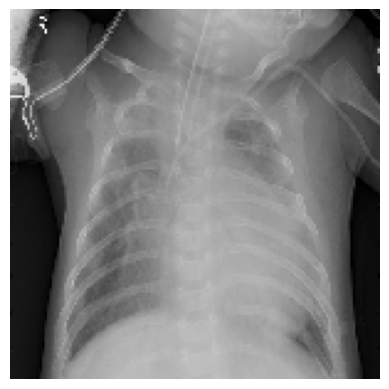

1/1 [==============================] - 0s 84ms/step
('PNEUMONIA', 0.9993574)
('NORMAL', 0.0006425458)


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# filename = "chest_xray/test/NORMAL/IM-0001-0001.jpeg"
filename = "chest_xray/test/PNEUMONIA/person1_virus_6.jpeg"
print('input:', filename)

# 画像サイズの設定
img_height, img_width = 150, 150

# 分類カテゴリ名の設定、学習時と同じ順番にする
classes = ['NORMAL','PNEUMONIA']
nb_classes = len(classes)

# 入力画像のロード
img = tf.keras.utils.load_img(filename, target_size=(img_height, img_width))
x = tf.keras.utils.img_to_array(img)

plt.imshow(img)
plt.axis("off")
plt.show()

# 4次元テンソルへ変換
x = np.expand_dims(x, axis=0)

# 入力データの正規化
x = x / 255.0

# ファインチューニングしたCNNモデルのロード
model = tf.keras.models.load_model('pneumonia_2.h5')

# 分類クラスを予測
pred = model.predict(x)[0]

# 予測結果を予測確率が上位2件分、カテゴリ名と予測確率を出力
top_n = 2
top_indices = pred.argsort()[-top_n:][::-1]
result = [(classes[i], pred[i]) for i in top_indices]
for x in result:
    print(x)